In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile
path = '/content/drive/MyDrive/facialexpression.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

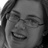

In [8]:
import tensorflow as tf
tf.keras.preprocessing.image.load_img('/content/train/happy/Training_10019449.jpg')

In [9]:
import numpy as np

img = tf.keras.preprocessing.image.load_img('/content/train/happy/Training_10019449.jpg')
np.array(img).shape

(48, 48, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=10,  # Degree range for random rotations
                                     zoom_range=0.2,  # Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
                                     horizontal_flip=True,  # Randomly flip inputs horizontally
                                     rescale=1/255)

In [11]:
train_dataset = train_generator.flow_from_directory(directory='/content/train',
                                                    target_size=(48, 48),  # Tuple of integers (height, width), defaults to (256, 256)
                                                    class_mode='categorical',
                                                    batch_size=16,  # Size of the batches of data (default: 32)
                                                    shuffle=True,  # Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order
                                                    seed=10)

Found 28709 images belonging to 7 classes.


In [12]:
train_dataset.classes


array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [13]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [14]:
np.unique(train_dataset.classes, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [15]:
test_generator = ImageDataGenerator(rescale=1/255)

test_dataset = test_generator.flow_from_directory(directory='/content/test',
                                                  target_size=(48, 48),
                                                  class_mode='categorical',
                                                  batch_size=1,
                                                  shuffle=False,
                                                  seed=10)

Found 7178 images belonging to 7 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 7
num_detectors = 32
width, height = 48, 48

network = Sequential()

network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:

print(network.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,480,615 (5.65 MB)

 Trainable params: 1,478,311 (5.64 MB)

 Non-trainable params: 2,304 (9.00 KB)

None


In [18]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
epochs = 1

network.fit(train_dataset, epochs=epochs)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.2237 - loss: 2.0190


In [20]:

from keras.models import save_model

# Save the trained network json
with open('trained_network.json', 'w') as trained_network_json:
    trained_network_json.write(network.to_json())

# Load the trained network json
with open('trained_network.json', 'r') as trained_network_json:
    trained_model_json = trained_network_json.read()

# Save weights
save_model(network, '/content/weights_emotions.hdf5')

# Load the trained model & weights
network = tf.keras.models.model_from_json(trained_model_json)
network.load_weights('/content/weights_emotions.hdf5')
network.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Evaluate the model

In [21]:
network.evaluate(test_dataset)

7178/7178 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.2545 - loss: 1.9100


[1.6480908393859863, 0.3640289902687073]

In [22]:
preds = network.predict(test_dataset)
preds

7178/7178 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


array([[0.02371701, 0.00409112, 0.03862977, ..., 0.09912161, 0.06251699,
        0.01557137],
       [0.06885675, 0.00939342, 0.16258939, ..., 0.25919583, 0.14610463,
        0.14434543],
       [0.17652607, 0.01729951, 0.12122841, ..., 0.15122424, 0.31692702,
        0.03326675],
       ...,
       [0.05074528, 0.01679025, 0.15367025, ..., 0.2312416 , 0.0791621 ,
        0.07627039],
       [0.07680173, 0.01109601, 0.18240912, ..., 0.03786693, 0.05779261,
        0.5960727 ],
       [0.0490557 , 0.0114058 , 0.29071826, ..., 0.12550513, 0.0830663 ,
        0.35687518]], dtype=float32)

In [23]:
preds = np.argmax(preds, axis=1)
preds

array([3, 4, 5, ..., 3, 6, 6])

In [24]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, preds)

0.3640289774310393

In [26]:
test_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Classify with Real Image

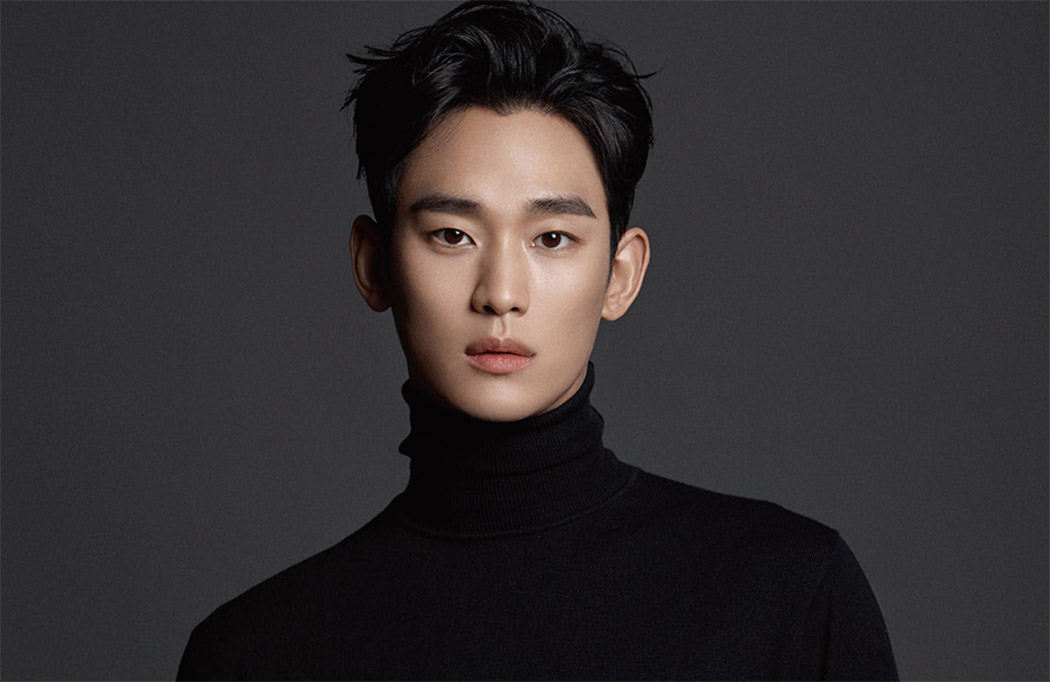

In [28]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/표정1.jpg')

cv2_imshow(image)

In [29]:
# Google Colab 환경에서 모델 다운로드
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

# 압축 해제
!bzip2 -d mmod_human_face_detector.dat.bz2

--2024-11-20 10:33:03--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  3.95MB/s    in 0.2s    

2024-11-20 10:33:04 (3.95 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]

bzip2: Output file mmod_human_face_detector.dat already exists.


In [33]:
import dlib

# CNN 얼굴 감지 모델 로드 (CPU 모드)
face_detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')
# 얼굴 감지 수행
face_detection = face_detector(image, 1)

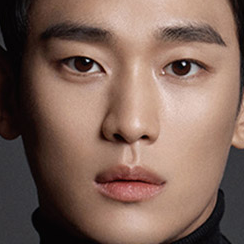

In [34]:
left, top, right, bottom = face_detection[0].rect.left(), face_detection[0].rect.top(), face_detection[0].rect.right(), face_detection[0].rect.bottom()

roi = image[top:bottom, left:right]

cv2_imshow(roi)

In [35]:

roi.shape

(244, 244, 3)

In [36]:
# Resize image
roi = cv2.resize(roi, (48, 48))

roi.shape

(48, 48, 3)

In [37]:
# Normalize
roi = roi / 255

In [38]:

roi = np.expand_dims(roi, axis=0)
roi.shape

(1, 48, 48, 3)

In [39]:
pred_probability = network.predict(roi)
pred_probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


array([[0.15010028, 0.01811599, 0.16728996, 0.18924609, 0.21691096,
        0.20787917, 0.05045757]], dtype=float32)

In [40]:


pred = np.argmax(pred_probability)
pred

4